In [3]:
import numpy as np

In [155]:
# MC-1 part d)

steps = 10000
beta = 1
energy = 1

def U(x):
    return x * energy

# 1. Choose random n_j

n_j = 1

sum_n_j = 0

# 2. Increase or decrease n_j by 1 (random)

for i in range(steps):
#    print("Step",i)
    rand = np.random.rand()
    if rand > 0.5:
        trial_n_j = n_j + 1
    else:
        trial_n_j = n_j - 1
    if trial_n_j < 0:
        trial_n_j = 0
    else:
        pass
#    print("Trial",trial_n_j)
# 3. Accept the trial move with probability acc(o → n)=min(1,exp[−β(U(n)−U(o))]
    
    DeltaU = U(trial_n_j) - U(n_j)
#    print("DeltaU", DeltaU)
    acc_prob = min(1, np.exp(-beta*DeltaU))
#    print("Acceptance probability", acc_prob)
    rand = np.random.rand()
    if rand < acc_prob:
        n_j = trial_n_j     
    else:
        pass
    sum_n_j += n_j
#    print(n_j)
    
# 4. Compute average 

expectation_n_j = sum_n_j / steps
theoretical_n_j = 1 / (np.exp(beta*energy) - 1)
difference_n_j = theoretical_n_j - expectation_n_j
print("MC expectation value estimate:",expectation_n_j)
print("Theoretical expectation value estimate:",theoretical_n_j)
print("Percentage error:",difference_n_j/theoretical_n_j,"%")

MC expectation value estimate: 0.5869
Theoretical expectation value estimate: 0.5819767068693265
Percentage error: -0.008459605122613557 %


In [80]:
# Part e)

def MC_simulation(steps, energy, beta):
    n_j = 1
    sum_n_j = 0
    for i in range(steps):
        rand = np.random.rand()
        if rand > 0.5:
            trial_n_j = n_j + 1
        else:
            trial_n_j = n_j - 1
        if trial_n_j < 0:
            trial_n_j = 0
        else:
            pass
        
        DeltaU = U(trial_n_j) - U(n_j)
        acc_prob = min(1, np.exp(-beta*DeltaU))
        rand = np.random.rand()
        if rand < acc_prob:
            n_j = trial_n_j     
        else:
            pass
        sum_n_j += n_j
        
    expectation_n_j = sum_n_j / steps
    theoretical_n_j = 1 / (np.exp(beta*energy) - 1)

    return expectation_n_j, theoretical_n_j       

Text(0.5, 0, 'Energy')

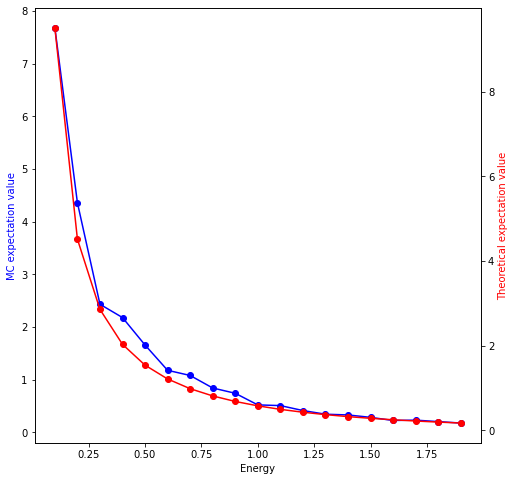

In [96]:
# Average occupation number 
import matplotlib.pyplot as plt

steps = 10000
beta = 1

expectation = []
theoretical = []

for i in range(1, 20):
    energy = i/10
    expectation_n_j, theoretical_n_j = MC_simulation(steps, energy, beta)
    expectation.append(expectation_n_j)
    theoretical.append(theoretical_n_j)
    
x = np.arange(0.1, 2.0, 0.1)

fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.plot(x, expectation, color="blue", marker="o")
ax2.plot(x, theoretical, color = "red", marker="o")
ax1.set_ylabel("MC expectation value", color="blue")
ax2.set_ylabel("Theoretical expectation value", color="red")
ax1.set_xlabel("Energy")

In [257]:
# Part f) 
# Updating averages only after trial move is accepted

steps = 100000
beta = 10
energy = 1

def U(x):
    return x * energy

# 1. Choose random n_j

n_j = 1
sum_n_j = 0
number_steps = 0

# 2. Increase or decrease n_j by 1 (random)

for i in range(steps):

    rand = np.random.rand()
    if rand > 0.5:
        trial_n_j = n_j + 1
    else:
        trial_n_j = n_j - 1
    if trial_n_j < 0:
        trial_n_j = 0
    else:
        pass

# 3. Accept the trial move with probability acc(o → n)=min(1,exp[−β(U(n)−U(o))]
    
    DeltaU = U(trial_n_j) - U(n_j)

    acc_prob = min(1, np.exp(-beta*DeltaU))

    rand = np.random.rand()
    if rand < acc_prob:
        n_j = trial_n_j     
        sum_n_j += n_j
        number_steps += 1 #Only average over accepted trial steps 
    else:
        pass


    
# 4. Compute average 

expectation_n_j = sum_n_j / number_steps
theoretical_n_j = 1 / (np.exp(beta*energy) - 1)
difference_n_j = theoretical_n_j - expectation_n_j
print("MC expectation value estimate:",expectation_n_j)
print("Theoretical expectation value estimate:",theoretical_n_j)
print("Percentage error:",difference_n_j/theoretical_n_j*100,"%")

MC expectation value estimate: 8.00624487099938e-05
Theoretical expectation value estimate: 4.5401991009687765e-05
Percentage error: -76.34127255104356 %


f) comment: The error becomes significant when the number of unsuccessful trial moves becomes large (relative to the number of iterations), which is the case when the acceptance probability becomes small. Since the acceptance probability goes as e^-(β(U(n)-U(o)), larger values of β exaggerate the energy difference of the trial state and hence make moves away from the most stable state (in this case n_j) increasingly unlikely. 

In the simulation, values of β > 10 commonly result in errors of 100%.

The error is also increasing for very small values or β (e.g. β=0.001). This is because small β values result in large acceptance probabilities so the trial_n_j is almost always successful. This leads to frequent moves away from the most likely value and exploration of a much larger phase space. It is important to understand that this error is not due to the fact that we only count successful trial_n_j towards the expectation value but is simply a result of undersampling. In that case, the error reduces to smaller values if we increase the number of steps of our Monte-Carlo simulation. 